### Rate equations to determine scattering rate

In [1]:
Γ = 1 / 25e-9;

In [264]:
# Define scattering/repumping rates, with entry (i, j) defined as R (lower state i, upper state j)
R = 
1e6 * [
#   A(000) B(000) A(100) 
    [3.0    0.0    0.0] # X(000)
    [0.0    2.0    0.0] # X(100)
    [0.0    0.0    2.0] # X(0200)
    [0.0    0.0    0.0] # X(Other)
] ./ Γ;

In [265]:
# Define VBRs, with entry (i, j) defined as VBR (lower state i, upper state j)
VBR =
[
    [0.9459  0.9678 0]
    [0.0475  0.0253 1]
    [2.70e-3 3.4e-4 0]
    [1 - 0.9459 - 0.0475 - 2.70e-3 1 - 0.9678 - 0.0253 - 3.4e-4 0]
];

In [266]:
# Initial population of the ground states
initial_populations = [0.9, 0.1, 0.0, 0.0];

In [267]:
const m = size(R, 1);
const n = size(R, 2);

In [268]:
using DifferentialEquations

In [269]:
function rate_equations!(du, u, p, t)
    
    du .= 0
    
    for i = 1:m, j = 1:n
        k = j+m
        du[i] += R[i,j] * (u[k] - u[i]) + VBR[i,j] * u[k]
        du[k] += R[i,j] * (u[i] - u[k])
    end
    
    for k = (m+1):(m+n)
        du[k] -= u[k]
        du[end] += u[k]
    end
    
    du[end] /= sum(u[1:(m-1)])
    
    return nothing
end

rate_equations! (generic function with 1 method)

In [270]:
u0 = vcat(initial_populations, zeros(n+1));
tspan = (0.0, 200e-6 * Γ)
prob = ODEProblem(rate_equations!, u0, tspan)
@time sol = solve(prob)
;

  1.387139 seconds (2.25 M allocations: 114.178 MiB, 1.38% gc time, 99.88% compilation time)


In [271]:
sol.u[end]

8-element Vector{Float64}:
   0.11102462483366336
   0.008431960395340062
   0.00044456526380417974
   0.8719283018245941
   0.0077477527352568494
   0.00040162003503715877
   2.1174947278336586e-5
 545.0795195690656

In [272]:
sol.u[end][1:m-1] |> sum

0.11990115049280761

In [273]:
sol.u[end][end] * Γ / sol.t[end]

2.725397597845328e6

In [274]:
(0.9470+0.0465+2.59e-3)^545

0.11822958625717216

In [275]:
using Plots

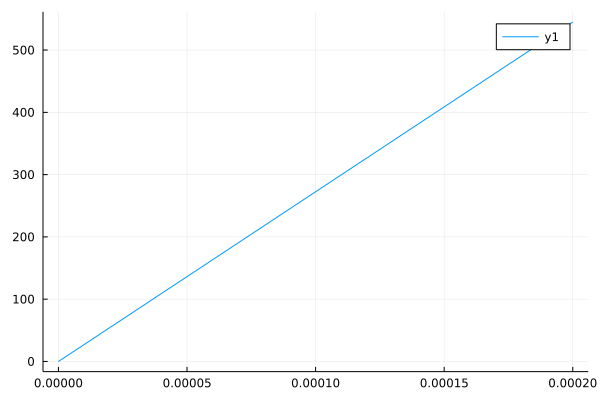

In [276]:
plot(sol.t[2:end] / Γ, [sol.u[x][end] for x in 2:length(sol.t)])